In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import datetime

In [79]:
%matplotlib inline

In [80]:
# Load the dataset
data = pd.read_csv('C:/Users/georg/Desktop/sickness_table.csv')

In [81]:
data.shape

(1152, 8)

In [82]:
# Display the first few rows of the dataset
print(data.head())

   Unnamed: 0      date  n_sick  calls  n_duty  n_sby  sby_need  dafted
0           0  4/1/2016      73   8154    1700     90         4       0
1           1  4/2/2016      64   8526    1700     90        70       0
2           2  4/3/2016      68   8088    1700     90         0       0
3           3  4/4/2016      71   7044    1700     90         0       0
4           4  4/5/2016      63   7236    1700     90         0       0


In [83]:
data.columns

Index(['Unnamed: 0', 'date', 'n_sick', 'calls', 'n_duty', 'n_sby', 'sby_need',
       'dafted'],
      dtype='object')

In [84]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [85]:
print("Data shape: ", data.shape)

Data shape:  (1152, 7)


In [86]:
# Display the first few rows of the dataset
print(data.head())

       date  n_sick  calls  n_duty  n_sby  sby_need  dafted
0  4/1/2016      73   8154    1700     90         4       0
1  4/2/2016      64   8526    1700     90        70       0
2  4/3/2016      68   8088    1700     90         0       0
3  4/4/2016      71   7044    1700     90         0       0
4  4/5/2016      63   7236    1700     90         0       0


In [87]:
#checking data types
print(data.dtypes)

date        object
n_sick       int64
calls        int64
n_duty       int64
n_sby        int64
sby_need     int64
dafted       int64
dtype: object


In [88]:
# Check for missing values
data.isnull().sum()
print(data.isnull().sum())

date        0
n_sick      0
calls       0
n_duty      0
n_sby       0
sby_need    0
dafted      0
dtype: int64


### DATA PREPROCESSING

In [89]:
# Define the target variable
target_variable = 'dafted'

In [90]:
# Convert date column to datetime object
data['date'] = pd.to_datetime(data['date'])

In [91]:
# Sort the dataset by the 'date' column in ascending order
data_sorted = data.sort_values('date')

In [92]:
# Set the reference date as the 15th day of the month
reference_date = pd.Timestamp(year=2019, month=3, day=15)

# Calculate the finalizing date for the upcoming month
finalizing_date = reference_date + pd.DateOffset(months=1)

# Split the dataset based on the finalizing date
training_data = data_sorted[data_sorted['date'] < finalizing_date]
validation_data = data_sorted[(data_sorted['date'] >= finalizing_date) & (data_sorted['date'] < finalizing_date + pd.DateOffset(days=15))]
test_data = data_sorted[data_sorted['date'] >= finalizing_date + pd.DateOffset(days=15)]

# Print the number of records in each split
print("Training data size:", len(training_data))
print("Validation data size:", len(validation_data))
print("Test data size:", len(test_data))

Training data size: 1109
Validation data size: 15
Test data size: 28


In [93]:
X_train = training_data.drop(columns=target_variable)
y_train = training_data[target_variable]
X_val = validation_data.drop(columns=target_variable)
y_val = validation_data[target_variable]
X_test = test_data.drop(columns=target_variable)
y_test = test_data[target_variable]

In [94]:
X_train['date'] = X_train['date'].astype('int64') // 10**9
X_val['date'] = X_val['date'].astype('int64') // 10**9
X_test['date'] = X_test['date'].astype('int64') // 10**9

### EXPLORATORY DATA ANALYSIS

In [95]:
# Display basic statistics of the numerical features
print(data.describe())

            n_sick         calls       n_duty   n_sby     sby_need  \
count  1152.000000   1152.000000  1152.000000  1152.0  1152.000000   
mean     68.808160   7919.531250  1820.572917    90.0    34.718750   
std      14.293942   1290.063571    80.086953     0.0    79.694251   
min      36.000000   4074.000000  1700.000000    90.0     0.000000   
25%      58.000000   6978.000000  1800.000000    90.0     0.000000   
50%      68.000000   7932.000000  1800.000000    90.0     0.000000   
75%      78.000000   8827.500000  1900.000000    90.0    12.250000   
max     119.000000  11850.000000  1900.000000    90.0   555.000000   

            dafted  
count  1152.000000  
mean     16.335938  
std      53.394089  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max     465.000000  


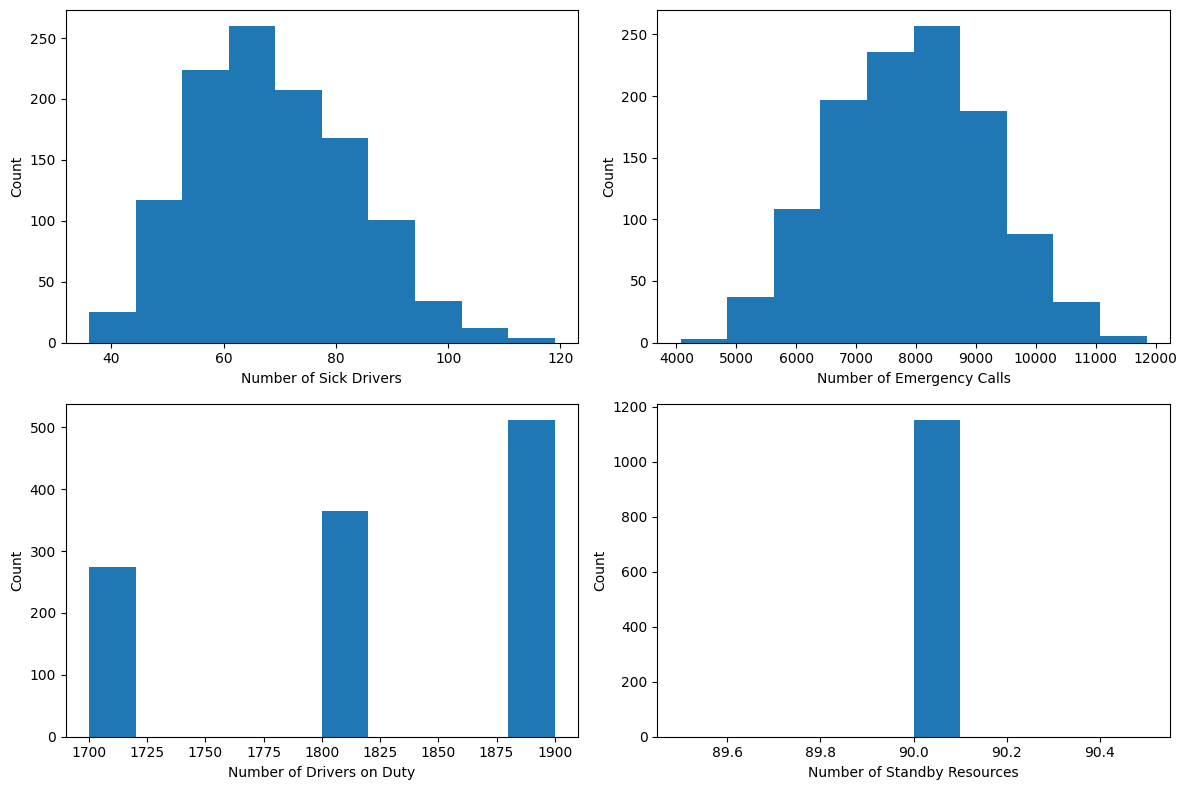

In [96]:
# Visualize the distributions of the numerical features

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Histogram of n_sick
axes[0, 0].hist(data['n_sick'], bins=10)
axes[0, 0].set_xlabel('Number of Sick Drivers')
axes[0, 0].set_ylabel('Count')

# Histogram of calls
axes[0, 1].hist(data['calls'], bins=10)
axes[0, 1].set_xlabel('Number of Emergency Calls')
axes[0, 1].set_ylabel('Count')

# Histogram of n_duty
axes[1, 0].hist(data['n_duty'], bins=10)
axes[1, 0].set_xlabel('Number of Drivers on Duty')
axes[1, 0].set_ylabel('Count')

# Histogram of n_sby
axes[1, 1].hist(data['n_sby'], bins=10)
axes[1, 1].set_xlabel('Number of Standby Resources')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

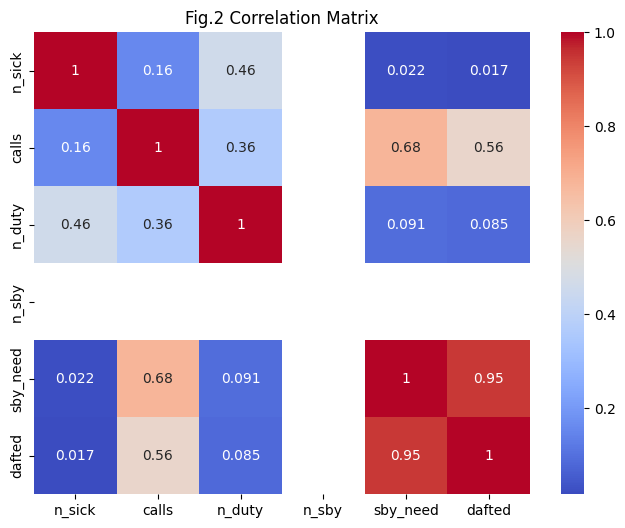

In [97]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Fig.2 Correlation Matrix')
plt.show()

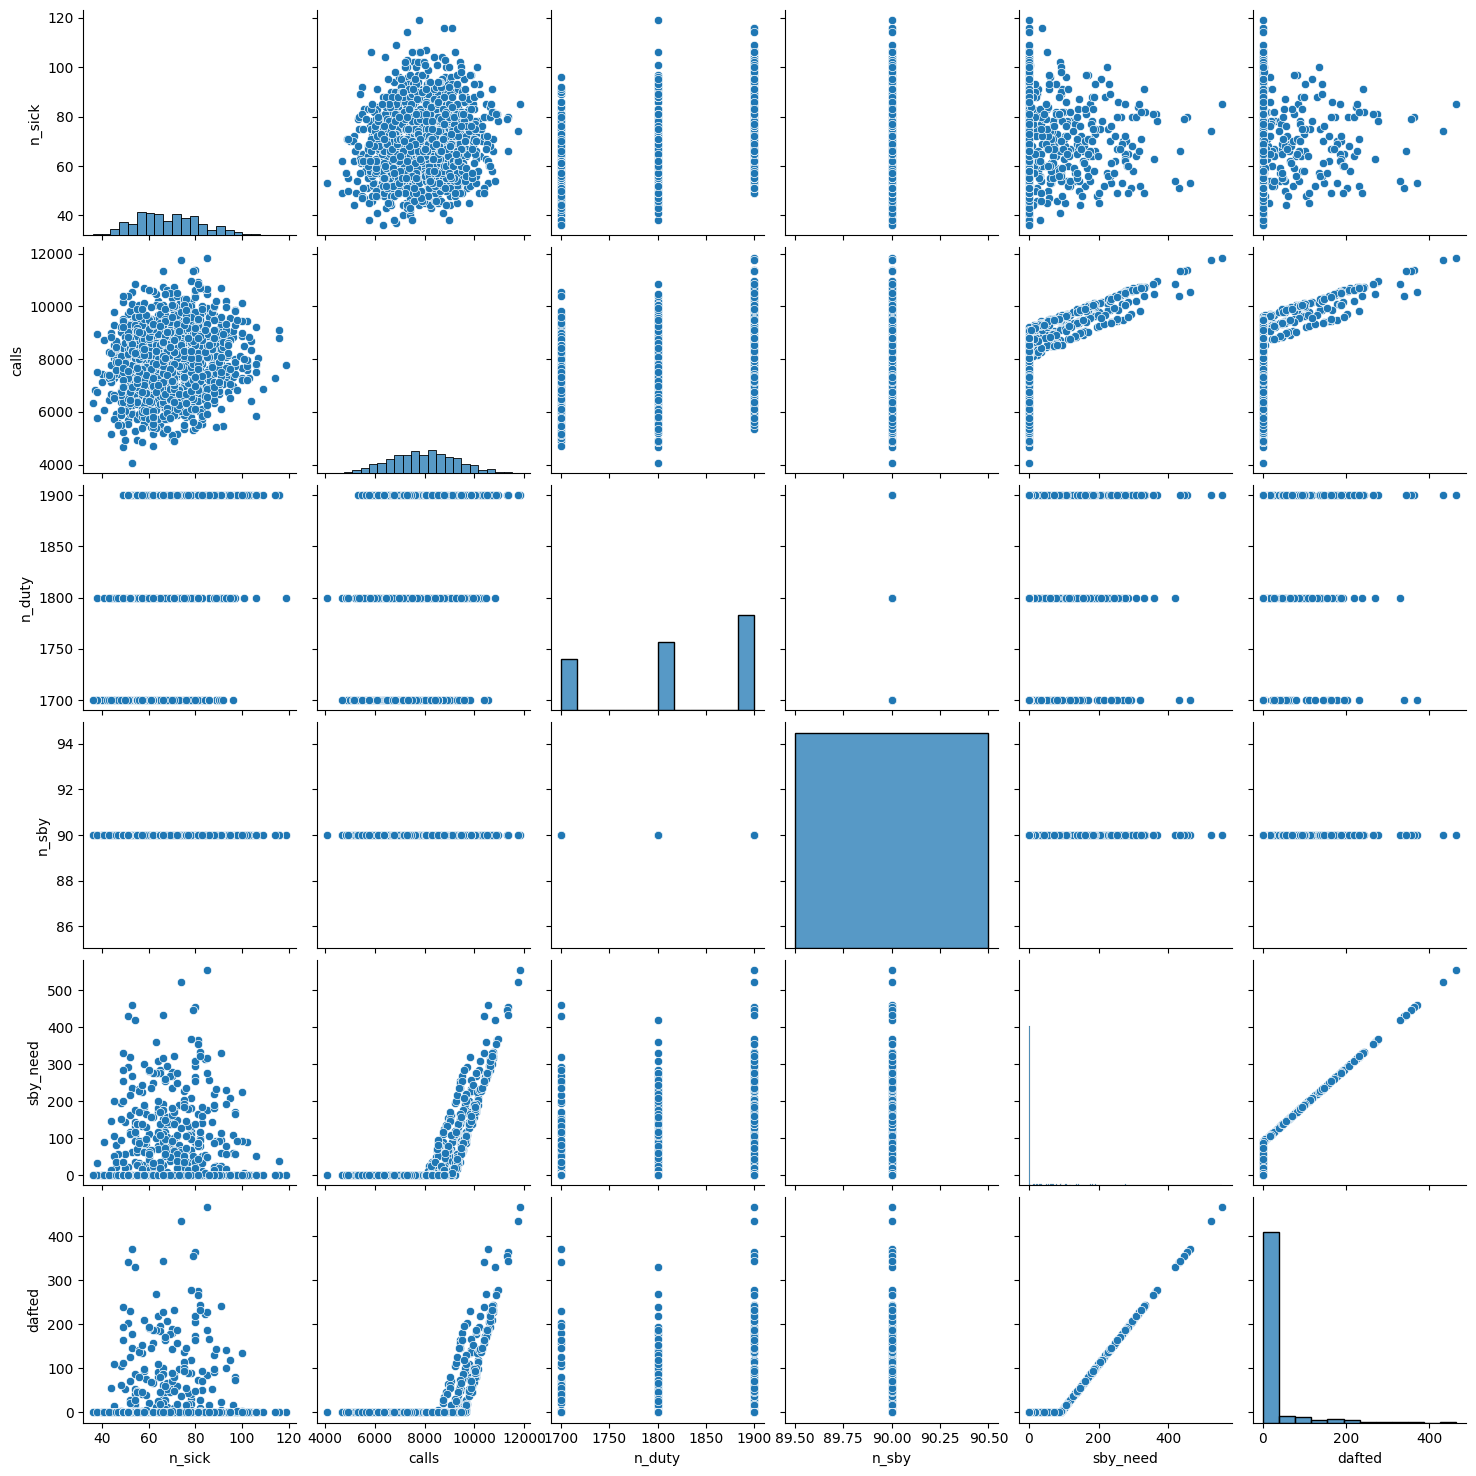

In [98]:
# Visualize the relationships between variables using pairplots
sns.pairplot(data)
plt.show()

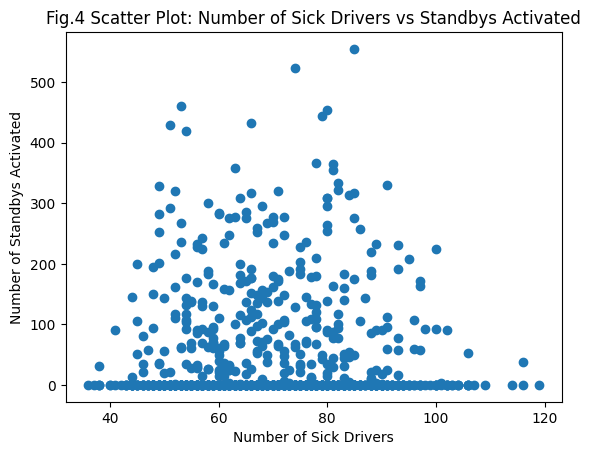

In [99]:
#exploring the relationship between number of sick and standby need
plt.scatter(data['n_sick'], data['sby_need'])
plt.xlabel('Number of Sick Drivers')
plt.ylabel('Number of Standbys Activated')
plt.title('Fig.4 Scatter Plot: Number of Sick Drivers vs Standbys Activated')
plt.show()

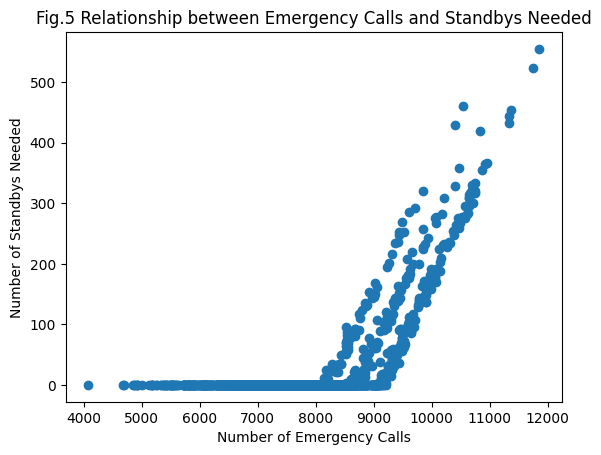

In [100]:
#relationship between emergency calls and standby need
plt.scatter(data['calls'], data['sby_need'])
plt.xlabel('Number of Emergency Calls')
plt.ylabel('Number of Standbys Needed')
plt.title('Fig.5 Relationship between Emergency Calls and Standbys Needed')
plt.show()

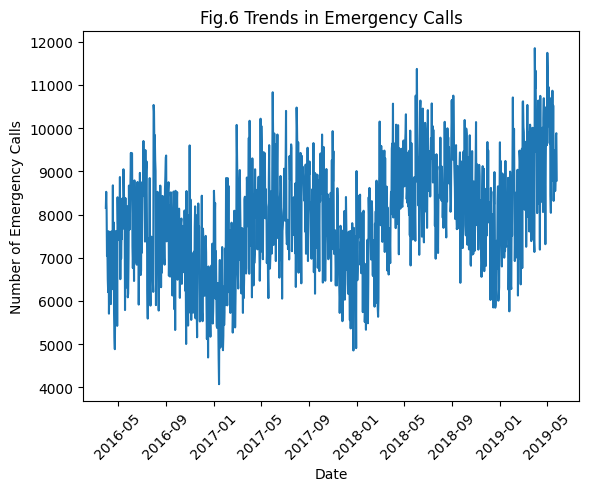

In [101]:
#a line plot that shows how the number of emergency calls varies over time
plt.plot(data['date'], data['calls'])
plt.xlabel('Date')
plt.ylabel('Number of Emergency Calls')
plt.title('Fig.6 Trends in Emergency Calls')
plt.xticks(rotation=45)
plt.show()

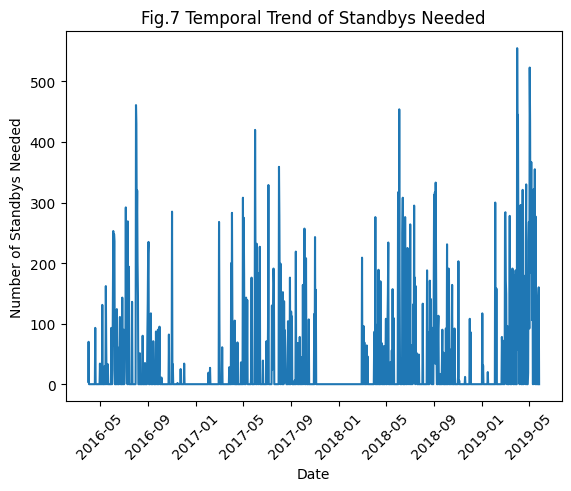

In [102]:
plt.plot(data['date'], data['sby_need'])
plt.xlabel('Date')
plt.ylabel('Number of Standbys Needed')
plt.title('Fig.7 Temporal Trend of Standbys Needed')
plt.xticks(rotation=45)
plt.show()

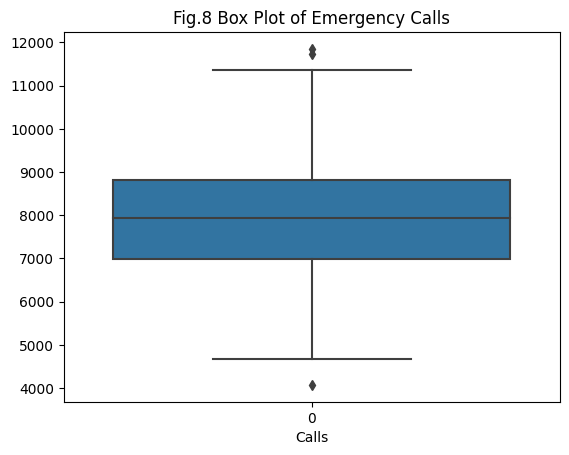

In [103]:
#a box plot that visualizes the distribution of emergency calls
sns.boxplot(data['calls'])
plt.xlabel('Calls')
plt.title('Fig.8 Box Plot of Emergency Calls')
plt.show()

### BASELINE MODEL DEVELOPMENT

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [105]:
# Train a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [106]:
#finding the intercept
print(lr_model.intercept_)

-68.88901767450275


In [107]:
#finding the coefficients
print(lr_model.coef_)

[ 5.90736612e-08 -2.94921254e-02 -6.99205718e-03  1.61649231e-02
  0.00000000e+00  6.87379322e-01]


In [108]:
cdf = pd.DataFrame(lr_model.coef_, X_train.columns, columns = ['Coeff'])

In [109]:
cdf.head(7)

,Coeff
date,5.907366e-08
n_sick,-2.949213e-02
calls,-6.992057e-03
n_duty,1.616492e-02
n_sby,0.000000e+00
sby_need,6.873793e-01


In [110]:
#prediction
lr_train_pred = lr_model.predict(X_train)
lr_val_pred = lr_model.predict(X_val)
lr_test_pred = lr_model.predict(X_test)

In [111]:
#predicting test dataset
lr_test_pred

array([141.76725523, 162.59051506,  47.79631298, 329.00890214,
       270.23856345, 107.84054084, 157.38574627, 227.25983688,
       153.55951812,  56.98473209, 188.80035401,  -7.31230698,
        -4.67792047, 197.96046873,  38.10345654,  44.64673498,
       219.51412477, -10.19136479, 168.56545826,  -6.5720005 ,
        -8.80270963,  -8.64112297,  34.85485228,  -8.38171069,
       -10.11700153,  83.17714108,  92.34739662,  -9.81591177])

In [112]:
# Evaluate the performance of the linear regression model
print('Linear Regression Model:')
print('Train MAE:', mean_absolute_error(y_train, lr_train_pred))
print('Train MSE:', mean_squared_error(y_train, lr_train_pred))
print('Train RMSE:', np.sqrt(mean_squared_error(y_train, lr_train_pred)))
print('Train R-squared:', r2_score(y_train, lr_train_pred))

Linear Regression Model:
Train MAE: 10.307512976570099
Train MSE: 234.97368186131385
Train RMSE: 15.328851289686186
Train R-squared: 0.8968054104823635


In [113]:
print('Test MAE:', mean_absolute_error(y_test, lr_test_pred))
print('Test MSE:', mean_squared_error(y_test, lr_test_pred))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, lr_test_pred)))
print('Test R-squared:', r2_score(y_test, lr_test_pred))

Test MAE: 26.379016921760655
Test MSE: 1215.580690602039
Test RMSE: 34.86517876911058
Test R-squared: 0.9197341532082874


#### Error Analysis

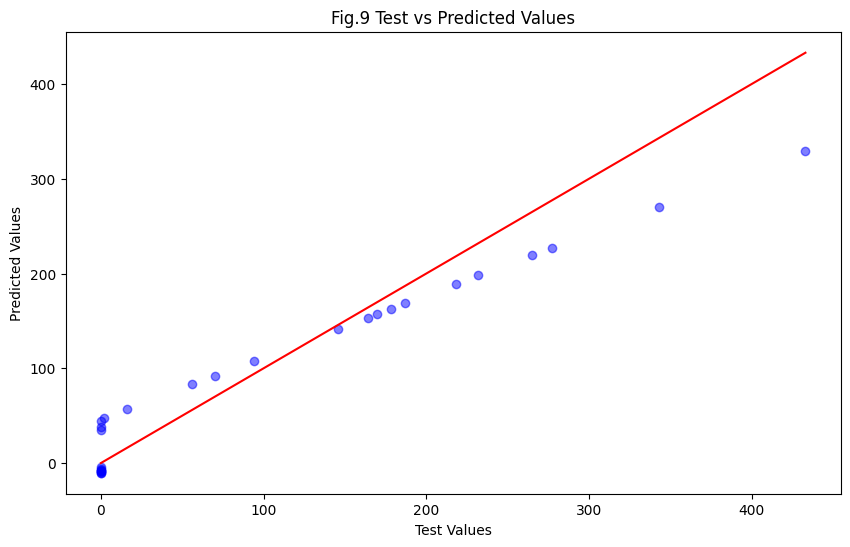

Mean Absolute Error (MAE): 26.38
Root Mean Squared Error (RMSE): 34.87
R-squared (R2): 0.92


In [114]:
def perform_error_analysis(y_test,lr_test_pred):
    # Calculate error metrics
    mae = mean_absolute_error(y_test,lr_test_pred)
    rmse = np.sqrt(mean_squared_error(y_test,lr_test_pred))
    r2 = r2_score(y_test,lr_test_pred)

    # Generate visualizations
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test,lr_test_pred, color='b', alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r')
    plt.xlabel('Test Values')
    plt.ylabel('Predicted Values')
    plt.title('Fig.9 Test vs Predicted Values')
    plt.savefig('test_vs_predicted.png')
    plt.show()

    # Display error metrics
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print(f'R-squared (R2): {r2:.2f}')
    
perform_error_analysis(y_test,lr_test_pred)

C:\Users\georg\AppData\Local\Temp\ipykernel_6968\1891569493.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-lr_test_pred))


Text(0.5, 1.0, 'Fig.10 Residuals')

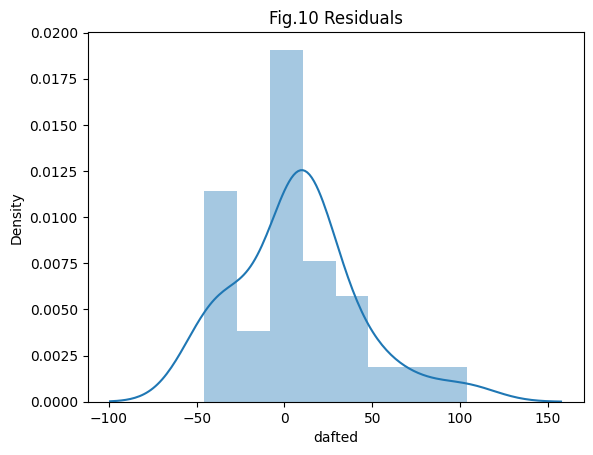

In [115]:
# finding the residuals between predicted and actual values(y_test) using distplot

sns.distplot((y_test-lr_test_pred))
plt.title('Fig.10 Residuals')

### ACCURATE PREDICTIVE MODEL

#### Data Preprocessing

In [116]:
from sklearn.model_selection import train_test_split
import datetime

def preprocess_data(data_path):
    data = pd.read_csv(data_path)

    # Drop unnecessary columns
    data.drop(['n_sby'], axis=1, inplace=True)
    
     # Convert date column to datetime object
    data['date'] = pd.to_datetime(data['date'])
    

    # Add month and day of week columns
    data['month'] = data['date'].dt.month
    data['day_of_week'] = data['date'].dt.dayofweek

    
    return data

In [117]:
# Call the preprocess_data() function and store the processed DataFrame
processed_data = preprocess_data('C:/Users/georg/Desktop/sickness_table.csv')

In [118]:
processed_data.head()

,Unnamed: 0,date,n_sick,calls,n_duty,sby_need,dafted,month,day_of_week
0,0,2016-04-01,73,8154,1700,4,0,4,4
1,1,2016-04-02,64,8526,1700,70,0,4,5
2,2,2016-04-03,68,8088,1700,0,0,4,6
3,3,2016-04-04,71,7044,1700,0,0,4,0
4,4,2016-04-05,63,7236,1700,0,0,4,1


In [119]:
processed_data.drop('Unnamed: 0', axis=1, inplace=True)

In [120]:
processed_data.head()

,date,n_sick,calls,n_duty,sby_need,dafted,month,day_of_week
0,2016-04-01,73,8154,1700,4,0,4,4
1,2016-04-02,64,8526,1700,70,0,4,5
2,2016-04-03,68,8088,1700,0,0,4,6
3,2016-04-04,71,7044,1700,0,0,4,0
4,2016-04-05,63,7236,1700,0,0,4,1


In [44]:
processed_data.shape

(1152, 8)

In [45]:
processed_data.columns

Index(['date', 'n_sick', 'calls', 'n_duty', 'sby_need', 'dafted', 'month',
       'day_of_week'],
      dtype='object')

In [46]:
# Define the target variable
target_variable = 'dafted'

In [47]:
# Convert date column to datetime object
data['date'] = pd.to_datetime(data['date'])

In [48]:
# Sort the dataset by the 'date' column in ascending order
data_sorted = processed_data.sort_values('date')


In [49]:
# Set the reference date as the 15th day of the month
reference_date = pd.Timestamp(year=2019, month=3, day=15)

# Calculate the finalizing date for the upcoming month
finalizing_date = reference_date + pd.DateOffset(months=1)

# Split the dataset based on the finalizing date
training_data = data_sorted[data_sorted['date'] < finalizing_date]
validation_data = data_sorted[(data_sorted['date'] >= finalizing_date) & (data_sorted['date'] < finalizing_date + pd.DateOffset(days=15))]
test_data = data_sorted[data_sorted['date'] >= finalizing_date + pd.DateOffset(days=15)]

# Print the number of records in each split
print("Training data size:", len(training_data))
print("Validation data size:", len(validation_data))
print("Test data size:", len(test_data))

Training data size: 1109
Validation data size: 15
Test data size: 28


In [50]:
X_train = training_data.drop(columns=target_variable)
y_train = training_data[target_variable]
X_val = validation_data.drop(columns=target_variable)
y_val = validation_data[target_variable]
X_test = test_data.drop(columns=target_variable)
y_test = test_data[target_variable]

In [51]:
X_train['date'] = X_train['date'].astype('int64') // 10**9
X_val['date'] = X_val['date'].astype('int64') // 10**9
X_test['date'] = X_test['date'].astype('int64') // 10**9

### Exploratory Data Analysis

In [52]:
# Check summary statistics of the dataset
print("Summary Statistics: \n", processed_data.describe())

Summary Statistics: 
             n_sick         calls       n_duty     sby_need       dafted  \
count  1152.000000   1152.000000  1152.000000  1152.000000  1152.000000   
mean     68.808160   7919.531250  1820.572917    34.718750    16.335938   
std      14.293942   1290.063571    80.086953    79.694251    53.394089   
min      36.000000   4074.000000  1700.000000     0.000000     0.000000   
25%      58.000000   6978.000000  1800.000000     0.000000     0.000000   
50%      68.000000   7932.000000  1800.000000     0.000000     0.000000   
75%      78.000000   8827.500000  1900.000000    12.250000     0.000000   
max     119.000000  11850.000000  1900.000000   555.000000   465.000000   

             month  day_of_week  
count  1152.000000  1152.000000  
mean      6.424479     3.002604  
std       3.394101     2.002386  
min       1.000000     0.000000  
25%       4.000000     1.000000  
50%       6.000000     3.000000  
75%       9.000000     5.000000  
max      12.000000     6.00000

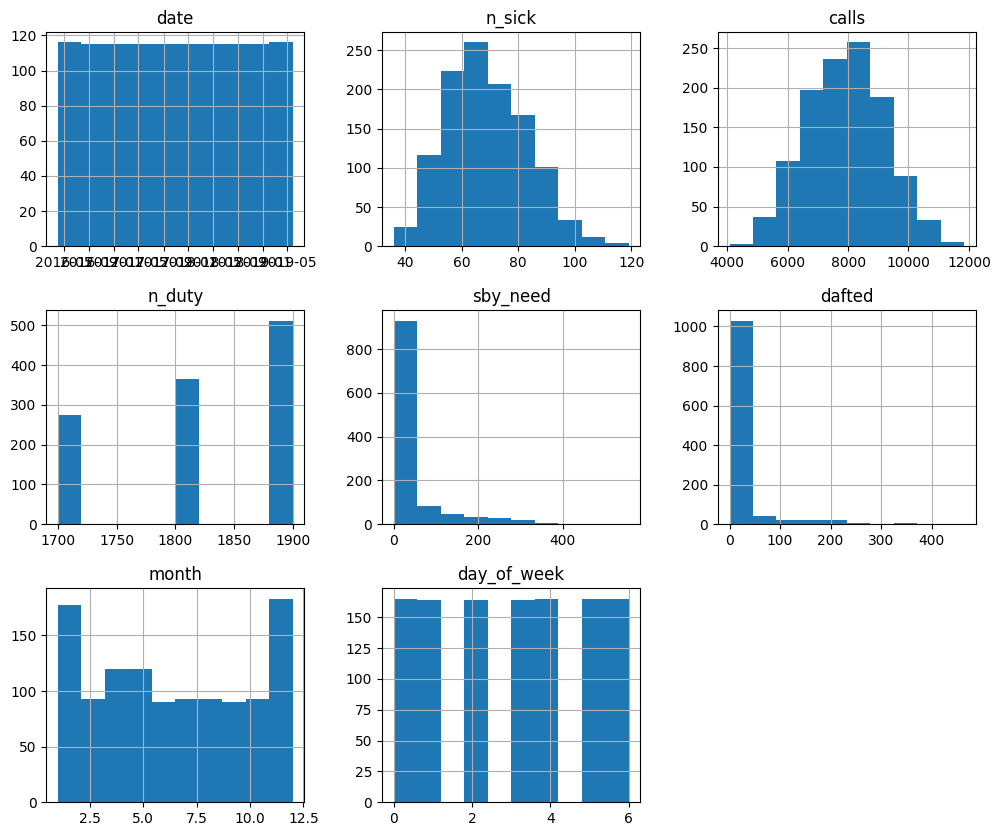

In [53]:
# Visualize the distribution of each column using histograms
processed_data.hist(figsize=(12,10))
plt.title('Fig.11 Distribution of columns')
plt.show()

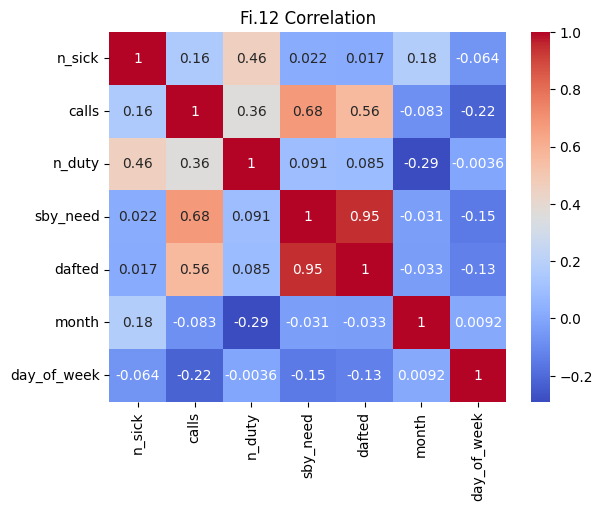

In [54]:
# Plot the correlation matrix to identify the relationship between the variables
corr_matrix = processed_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Fi.12 Correlation')
plt.show()

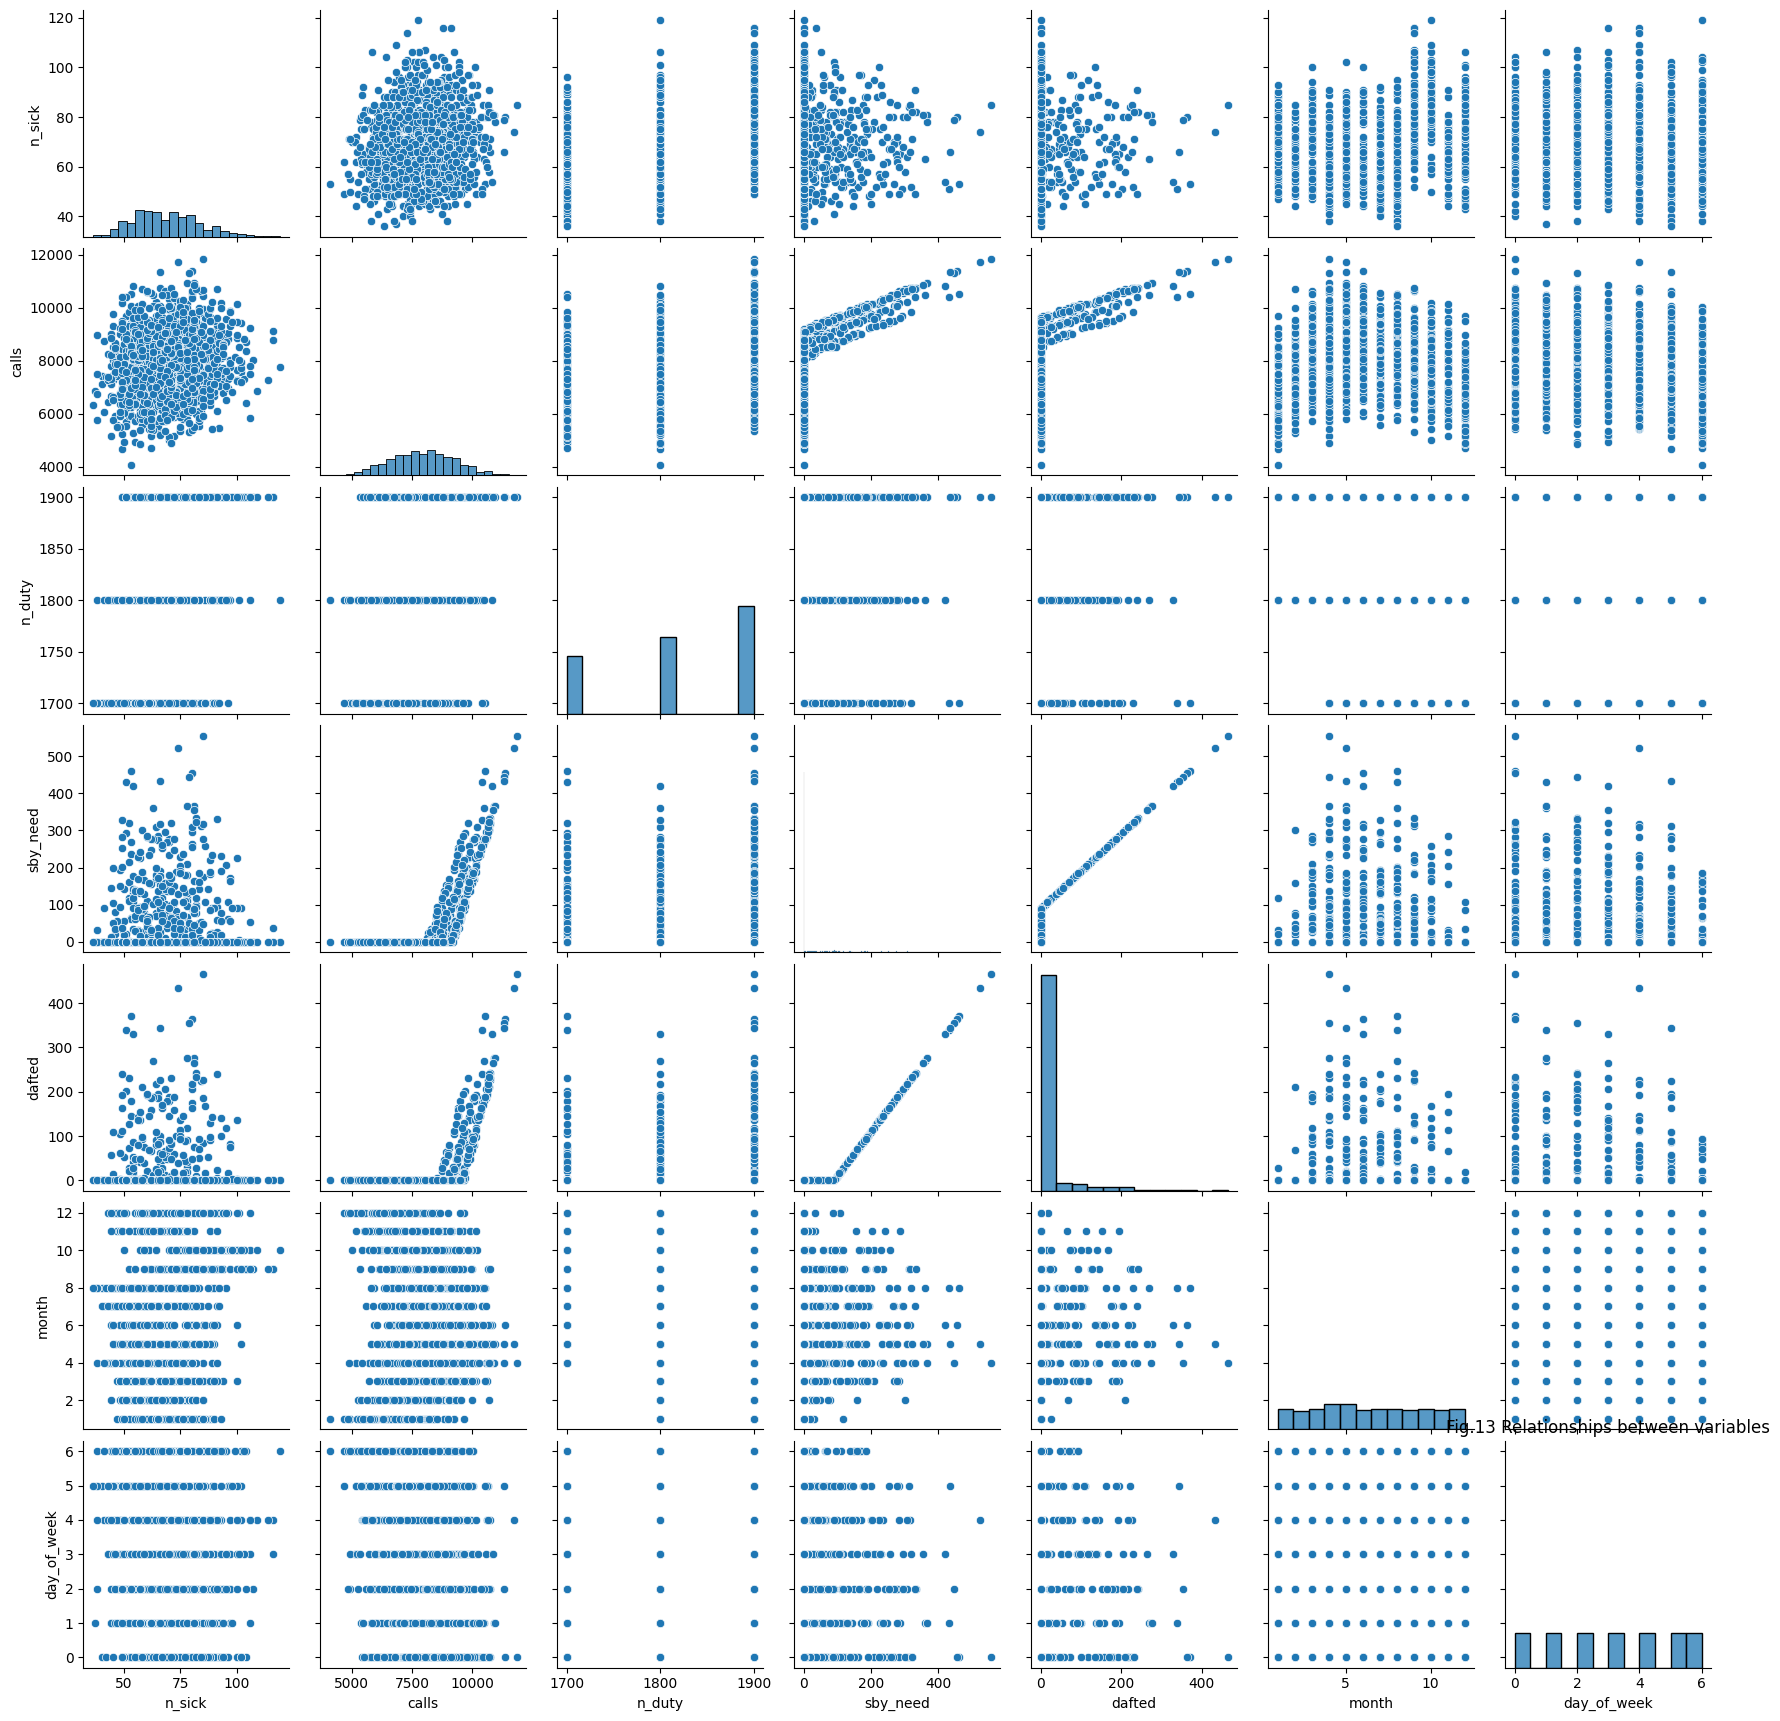

In [55]:
# Visualize the relationships between variables using pairplots
sns.pairplot(processed_data)
plt.title('Fig.13 Relationships between variables')
plt.show()

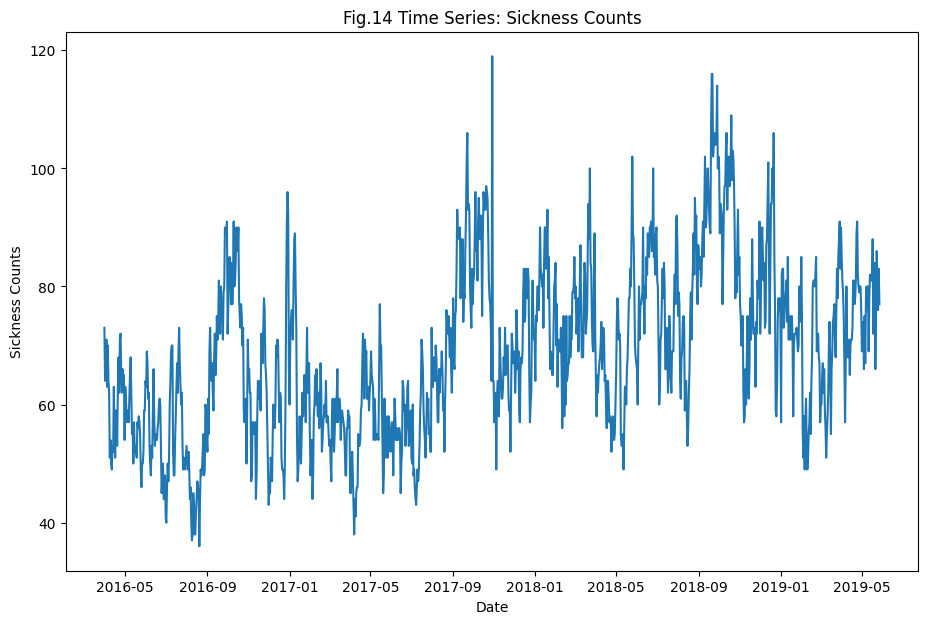

In [56]:
# Time series plot of sickness counts
plt.figure(figsize=(11,7))
plt.plot(processed_data['date'], processed_data['n_sick'])
plt.xlabel('Date')
plt.ylabel('Sickness Counts')
plt.title('Fig.14 Time Series: Sickness Counts')
plt.show()

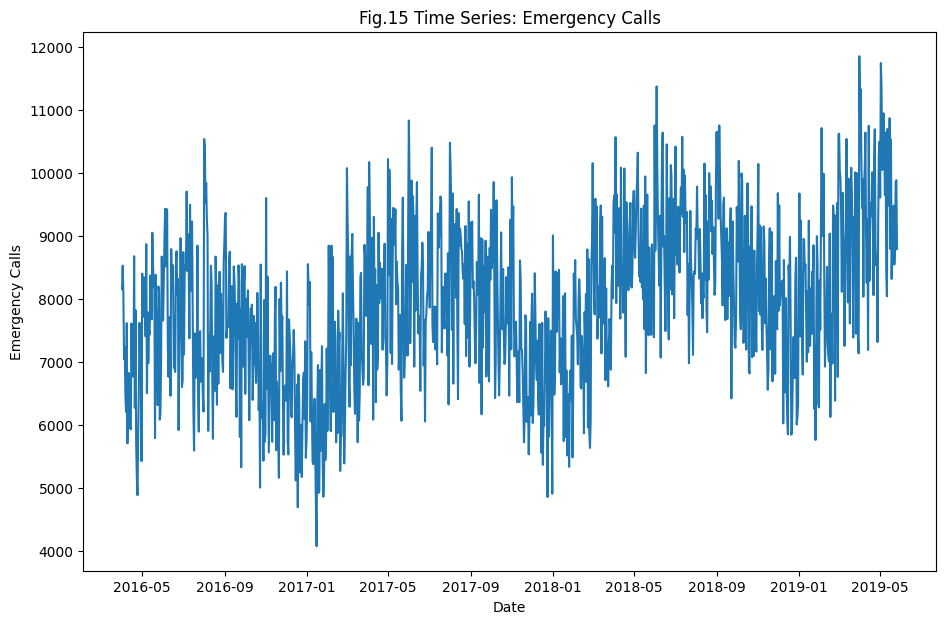

In [57]:
# Time series plot of emergency calls
plt.figure(figsize=(11,7))
plt.plot(data['date'], data['calls'])
plt.xlabel('Date')
plt.ylabel('Emergency Calls')
plt.title('Fig.15 Time Series: Emergency Calls')
plt.show()

In [58]:
# Calculate the average sickness counts and emergency calls by month
avg_sickness_by_month = processed_data.groupby('month')['n_sick'].mean()
avg_calls_by_month = processed_data.groupby('month')['calls'].mean()

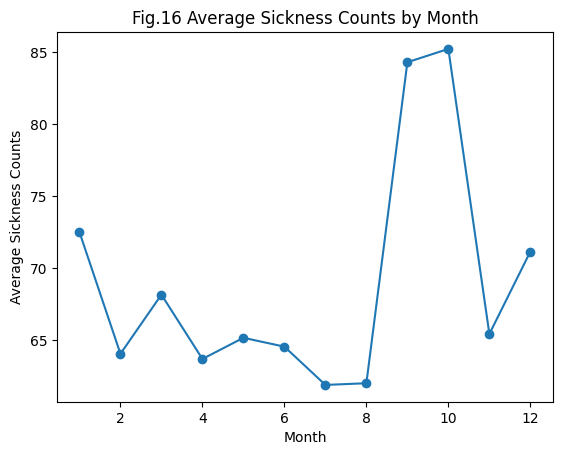

In [59]:
# Plotting average sickness counts by month
plt.plot(avg_sickness_by_month.index, avg_sickness_by_month.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Average Sickness Counts')
plt.title('Fig.16 Average Sickness Counts by Month')
plt.show()

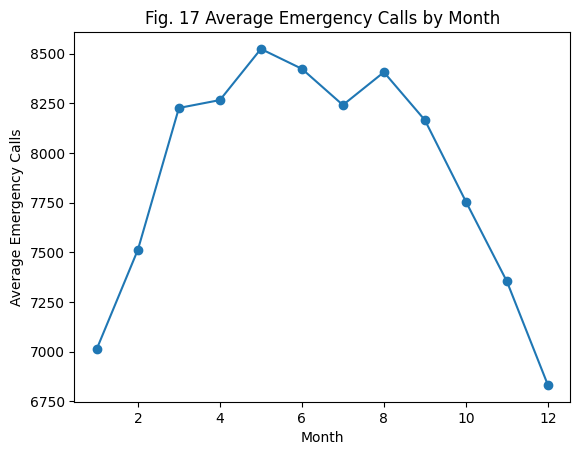

In [60]:
# Plotting average emergency calls by month
plt.plot(avg_calls_by_month.index, avg_calls_by_month.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Average Emergency Calls')
plt.title('Fig. 17 Average Emergency Calls by Month')
plt.show()

In [61]:
# Calculate the average sickness counts and emergency calls by day of the week
avg_sickness_by_day = processed_data.groupby('day_of_week')['n_sick'].mean()
avg_calls_by_day = processed_data.groupby('day_of_week')['calls'].mean()

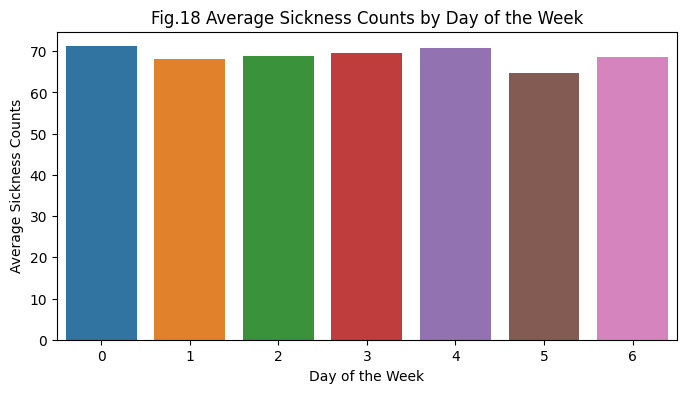

In [62]:
# Plotting average sickness counts by day of the week
plt.figure(figsize=(8, 4))
sns.barplot(x=avg_sickness_by_day.index, y=avg_sickness_by_day.values)
plt.xlabel('Day of the Week')
plt.ylabel('Average Sickness Counts')
plt.title('Fig.18 Average Sickness Counts by Day of the Week')
plt.show()

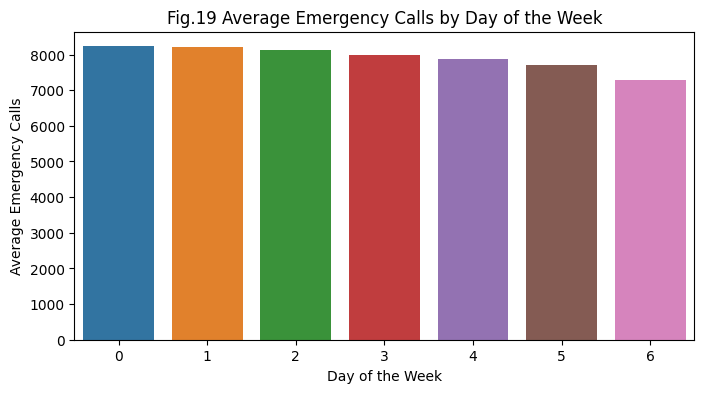

In [63]:
# Plotting average emergency calls by day of the week
plt.figure(figsize=(8, 4))
sns.barplot(x=avg_calls_by_day.index, y=avg_calls_by_day.values)
plt.xlabel('Day of the Week')
plt.ylabel('Average Emergency Calls')
plt.title('Fig.19 Average Emergency Calls by Day of the Week')
plt.show()

#### Model Development

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib


In [65]:
# Train a random forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

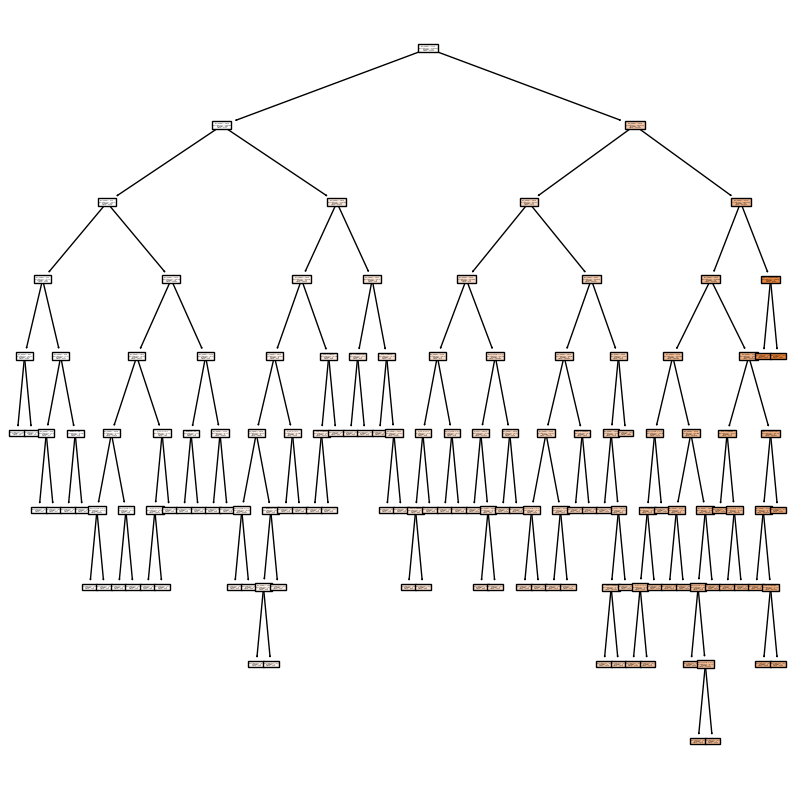

In [77]:
from sklearn import tree
# Get the first decision tree from the Random Forest
decision_tree = rf_model.estimators_[0]

# Get the feature names
feature_names = X_train.columns

# Visualize the decision tree
plt.figure(figsize=(10, 10))
tree.plot_tree(decision_tree, filled=True, feature_names=feature_names)
plt.show()

In [66]:
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

In [67]:
#predicting test dataset
rf_test_pred

array([143.21, 179.52,   1.95, 400.86, 353.4 ,  93.03, 168.5 , 278.03,
       164.72,  16.13, 221.83,   0.  ,   0.  , 230.22,   0.  ,   0.  ,
       273.13,   0.  , 187.29,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,  55.51,  69.1 ,   0.  ])

In [68]:
# Evaluate the performance of the random forest regression model
print('Random Forest Regression Model:')
print('Train MSE:', mean_squared_error(y_train, rf_train_pred))
print('Train R-squared:', r2_score(y_train, rf_train_pred))
print('Test MSE:', mean_squared_error(y_test, rf_test_pred))
print('Test R-squared:', r2_score(y_test, rf_test_pred))

Random Forest Regression Model:
Train MSE: 2.0831887285843105
Train R-squared: 0.9990851153881101
Test MSE: 44.3247178571428
Test R-squared: 0.997073200454636


In [69]:
# Save the trained model to a file
joblib.dump(rf_model, 'Accurate_Predictive_trained_model.joblib')

['Accurate_Predictive_trained_model.joblib']

### Error Analysis

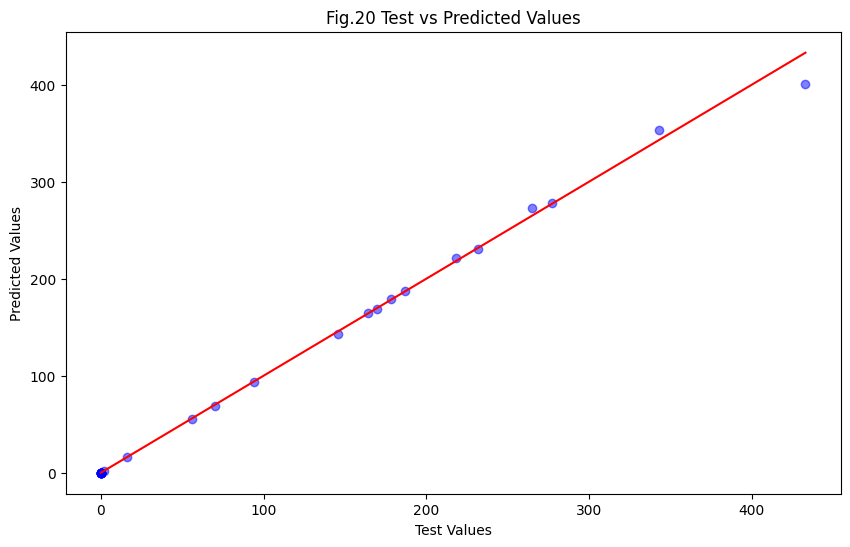

Mean Absolute Error (MAE): 2.38
Root Mean Squared Error (RMSE): 6.66
R-squared (R2): 1.00


In [70]:
def perform_error_analysis(y_test,rf_test_pred):
    # Calculate error metrics
    mae = mean_absolute_error(y_test,rf_test_pred)
    rmse = np.sqrt(mean_squared_error(y_test,rf_test_pred))
    r2 = r2_score(y_test,rf_test_pred)

    # Generate visualizations
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test,rf_test_pred, color='b', alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r')
    plt.xlabel('Test Values')
    plt.ylabel('Predicted Values')
    plt.title('Fig.20 Test vs Predicted Values')
    plt.savefig('test_vs_predicted.png')
    plt.show()

    # Display error metrics
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print(f'R-squared (R2): {r2:.2f}')
    
 
perform_error_analysis(y_test,rf_test_pred)

C:\Users\georg\AppData\Local\Temp\ipykernel_6968\3472950935.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-rf_test_pred))


Text(0.5, 1.0, 'Fig.21 Residuals')

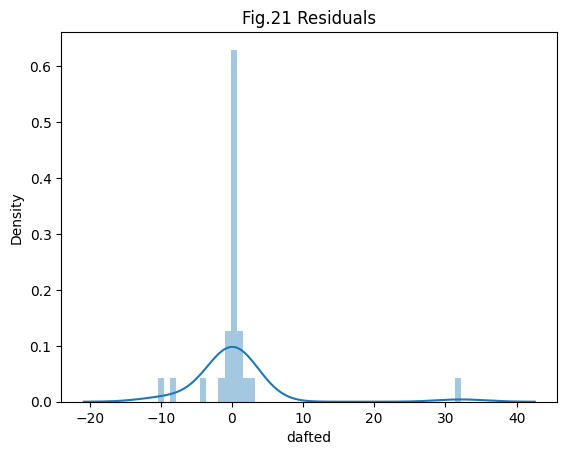

In [71]:
# finding the residuals between predicted and actual values(y_test) using distplot

sns.distplot((y_test-rf_test_pred))
plt.title('Fig.21 Residuals')

### Feature importance to the model

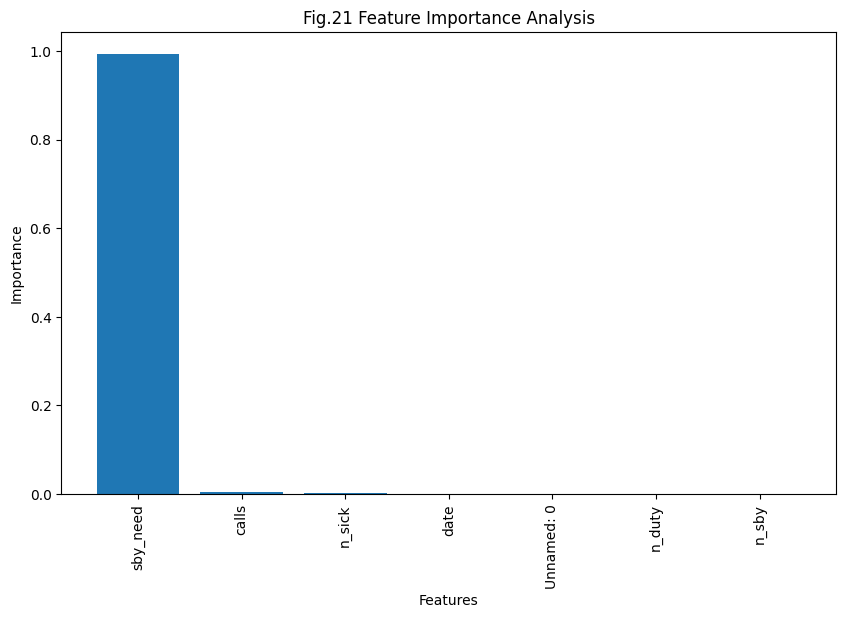

In [73]:
def calculate_feature_importance(X, y):
    # Preprocess the 'date' column
    X['date'] = pd.to_datetime(X['date']).apply(lambda x: x.timestamp())
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create an instance of the RandomForestRegressor model
    rf_model = RandomForestRegressor()

    # Fit the model to the training data
    rf_model.fit(X_train, y_train)

    # Retrieve the feature importances from the trained model
    feature_importances = rf_model.feature_importances_

    # Get the feature names from the input DataFrame
    feature_names = X.columns

    # Sort the feature importances in descending order
    sorted_indices = np.argsort(feature_importances)[::-1]
    sorted_feature_importances = feature_importances[sorted_indices]
    sorted_feature_names = feature_names[sorted_indices]

    # Create a bar plot to display the feature importances
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances)
    plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('Fig.21 Feature Importance Analysis')

    # Save the plot to a file or display it directly
    plt.savefig('feature_importance_plot.png')
    #plt.show()

data = pd.read_csv('C:/Users/georg/Desktop/sickness_table.csv')  
X = data.drop(columns=['dafted']) 
y = data['dafted']
calculate_feature_importance(X, y)


## GUI

In [ ]:
import datetime
import tkinter as tk

# Function to perform the prediction
def predict(date, n_sick, calls, n_duty,):
    # Convert the date input to a datetime object
    date = datetime.datetime.strptime(date_input, "%Y-%m-%d")

    # Extract the day of the week (Monday: 0, Tuesday: 1, etc.)
    day_of_week = date.weekday()

    # Extract the month (January: 1, February: 2, etc.)
    month = date.month

    # Perform prediction using the extracted features and other input values
    prediction =rf_model.predict(day_of_week, month, n_sick, calls, n_sby)

    return prediction

# Create the main window
window = tk.Tk()
window.title("Standby Duty Planning")

# Add GUI components
label = tk.Label(window, text="Enter the required data:")
label.pack()

# input fields
date = tk.Entry(window)
date.pack()

n_sick = tk.Entry(window)
n_sick.pack()

calls = tk.Entry(window)
calls.pack()

n_sby = tk.Entry(window)
n_sby.pack()

# Function to handle button click
def predict():
    # Get the input values
    date = date.get()
    n_sick = sickness.get()
    calls = calls.get()
    n_sby = n_sby.get()

    # Perform prediction based on the input values and feature engineering within the prediction function
    prediction = predict(date, n_sick, calls, n_sby)

    # Display the prediction
    prediction_label.config(text=f"Prediction: {prediction} standby drivers")

# Button to initiate prediction
predict_button = tk.Button(window, text="Predict", command=predict)
predict_button.pack()

# Label to display the prediction
prediction_label = tk.Label(window, text="")
prediction_label.pack()

# Run the main event loop
window.mainloop()